In [1]:
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\acs\OneDrive\Documents\Netflix Data Analysis\netflix_titles.csv")

In [3]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.notnull().sum()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [9]:
df.dropna().sum() # Removes missing values

show_id         s8s9s10s13s25s28s29s30s39s42s43s44s45s47s49s52...
type            MovieTV ShowMovieMovieMovieMovieMovieMovieMovi...
title           SankofaThe Great British Baking ShowThe Starli...
director        Haile GerimaAndy DevonshireTheodore MelfiChris...
cast            Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...
country         United States, Ghana, Burkina Faso, United Kin...
date_added      September 24, 2021September 24, 2021September ...
release_year                                             10731941
rating          TV-MATV-14PG-13TV-MATV-14PG-13PG-13PG-13PG-13P...
duration        125 min9 Seasons104 min127 min166 min103 min97...
listed_in       Dramas, Independent Movies, International Movi...
description     On a photo shoot in Ghana, an American model s...
dtype: object

In [10]:
# Converts column to a specific data type.
df['release_year'] = df['release_year'].astype(int)
print(df.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int32
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [11]:
df['rating'].str.strip()                  #Removes leading and trailing spaces.

0       PG-13
1       TV-MA
2       TV-MA
3       TV-MA
4       TV-MA
        ...  
8802        R
8803    TV-Y7
8804        R
8805       PG
8806    TV-14
Name: rating, Length: 8807, dtype: object

In [12]:
df['type'].str.lower()                    #Converts text to lowercase.

0         movie
1       tv show
2       tv show
3       tv show
4       tv show
         ...   
8802      movie
8803    tv show
8804      movie
8805      movie
8806      movie
Name: type, Length: 8807, dtype: object

In [13]:
df["director"].fillna(0)           #for fill the null values

0       Kirsten Johnson
1                     0
2       Julien Leclercq
3                     0
4                     0
             ...       
8802      David Fincher
8803                  0
8804    Ruben Fleischer
8805       Peter Hewitt
8806        Mozez Singh
Name: director, Length: 8807, dtype: object

In [14]:
df.shape

(8807, 12)

In [17]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# Exploratory Data Analysis (EDA)

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


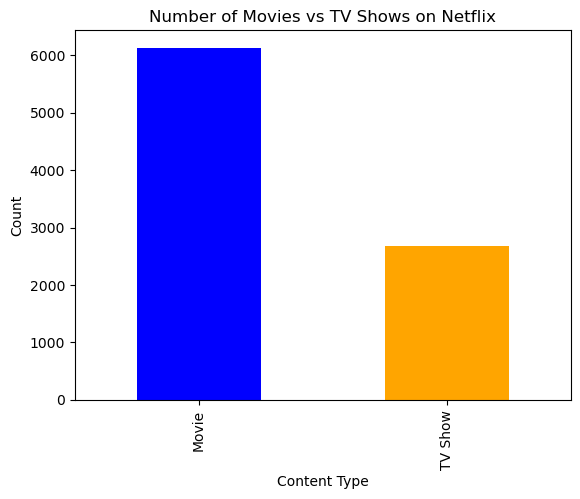

In [33]:
# Q1.How many movies and TV shows are available on Netflix?

# Count the number of Movies vs TV Shows
content_counts = df["type"].value_counts()
print(content_counts)

# Visualization
content_counts.plot(kind="bar", color=["blue", "orange"])
plt.title("Number of Movies vs TV Shows on Netflix")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()

In [35]:
# Q2.What percentage of Netflix content is movies vs TV shows?

# Calculate percentage
percentages = df["type"].value_counts(normalize=True) * 100
print(percentages)

type
Movie      69.615079
TV Show    30.384921
Name: proportion, dtype: float64


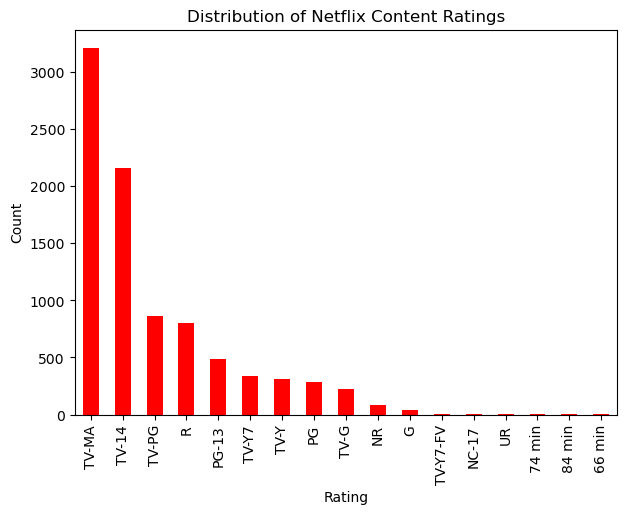

In [39]:
#Q3. What is the distribution of Netflix content ratings 

# Count rating occurrences
rating_counts = df["rating"].value_counts()

# Plot
plt.figure(figsize=(7,5))
rating_counts.plot(kind="bar", color="red")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Netflix Content Ratings")
plt.show()

In [41]:
#Q4. What is the average duration of movies and TV shows?

# Extract movie duration in minutes
df_movies = df[df["type"] == "Movie"]
df_movies["duration"] = df_movies["duration"].str.replace(" min", "").astype(float)

# Extract TV show seasons count
df_tvshows = df[df["type"] == "TV Show"]
df_tvshows["duration"] = df_tvshows["duration"].str.replace(" Season", "").str.replace("s", "").astype(float)

# Print average values
print("Average movie duration:", df_movies["duration"].mean(), "minutes")
print("Average TV show seasons:", df_tvshows["duration"].mean(), "seasons")

Average movie duration: 99.57718668407311 minutes
Average TV show seasons: 1.764947683109118 seasons


C:\Users\acs\AppData\Local\Temp\ipykernel_12696\641559471.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies["duration"] = df_movies["duration"].str.replace(" min", "").astype(float)
C:\Users\acs\AppData\Local\Temp\ipykernel_12696\641559471.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tvshows["duration"] = df_tvshows["duration"].str.replace(" Season", "").str.replace("s", "").astype(float)


In [43]:
#Q5. which country has top 10 ratings in movies

# Convert rating to numeric 
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Filter only movies
movies_df = df[df['type'] == 'Movie']

# Group by country and calculate average rating
country_ratings = movies_df.groupby('country')['rating'].mean().reset_index()

# Sort by rating in descending order and get top 10
top_10_countries = country_ratings.sort_values(by='rating', ascending=False).head(10)


print(top_10_countries)

                                             country  rating
0                                  , France, Algeria     NaN
1                                          Argentina     NaN
2  Argentina, Brazil, France, Poland, Germany, De...     NaN
3                                   Argentina, Chile     NaN
4                             Argentina, Chile, Peru     NaN
5                                  Argentina, France     NaN
6   Argentina, France, United States, Germany, Qatar     NaN
7                                   Argentina, Italy     NaN
8                                   Argentina, Spain     NaN
9                           Argentina, United States     NaN


In [45]:
#Q6. How many countries release year in 2021


# Convert release_year to numeric
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

# Filter data for 2021
df_2021 = df[df['release_year'] == 2021]

# Extract unique countries
unique_countries_2021 = df_2021['country'].dropna().unique()

# Count the number of countries
num_countries = len(unique_countries_2021)

print(f"Number of countries that released content in 2021: {num_countries}")

Number of countries that released content in 2021: 75
